<a href="https://colab.research.google.com/github/lobnamer/TP2_big_data/blob/main/Copie_de_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
35224,9,CASH_OUT,515073.89,C1063511952,184137.0,0.00,C266912553,2580927.41,3977807.83,0.0,0.0
35225,9,CASH_OUT,412097.45,C100168689,0.0,0.00,C836878317,630713.16,1224623.04,0.0,0.0
35226,9,PAYMENT,3930.90,C2039165569,121975.0,118044.10,M1262614033,0.00,0.00,0.0,0.0
35227,9,PAYMENT,4003.77,C1799280526,5293.0,1289.23,M757028579,0.00,0.00,0.0,0.0
35228,9,PAYM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(35229, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35229 entries, 0 to 35228
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            35229 non-null  int64  
 1   type            35229 non-null  object 
 2   amount          35228 non-null  float64
 3   nameOrig        35228 non-null  object 
 4   oldbalanceOrg   35228 non-null  float64
 5   newbalanceOrig  35228 non-null  float64
 6   nameDest        35228 non-null  object 
 7   oldbalanceDest  35228 non-null  float64
 8   newbalanceDest  35228 non-null  float64
 9   isFraud         35228 non-null  float64
 10  isFlaggedFraud  35228 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,35229.000000,3.522800e+04,3.522800e+04,3.522800e+04,3.522800e+04,3.522800e+04,35228.000000,35228.0
mean,6.805501,1.417661e+05,8.352735e+05,8.500242e+05,8.483536e+05,1.168586e+06,0.002555,0.0
std,2.140220,3.058733e+05,2.397737e+06,2.436269e+06,2.492910e+06,3.020583e+06,0.050481,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,6.371968e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.264583e+04,2.013808e+04,3.717585e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.684584e+05,1.582581e+05,1.661775e+05,4.123153e+05,7.512815e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.878359e+07,3.130692e+07,1.000000,0.0


In [ ]:
df.nunique()

step                  9
type                  6
amount            35079
nameOrig          35228
oldbalanceOrg     22928
newbalanceOrig    18425
nameDest          20770
oldbalanceDest    16859
newbalanceDest     5192
isFraud               2
isFlaggedFraud        1
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Numerical type columns:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['step'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df['step'].value_counts()

8    21097
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
9      131
Name: step, dtype: int64

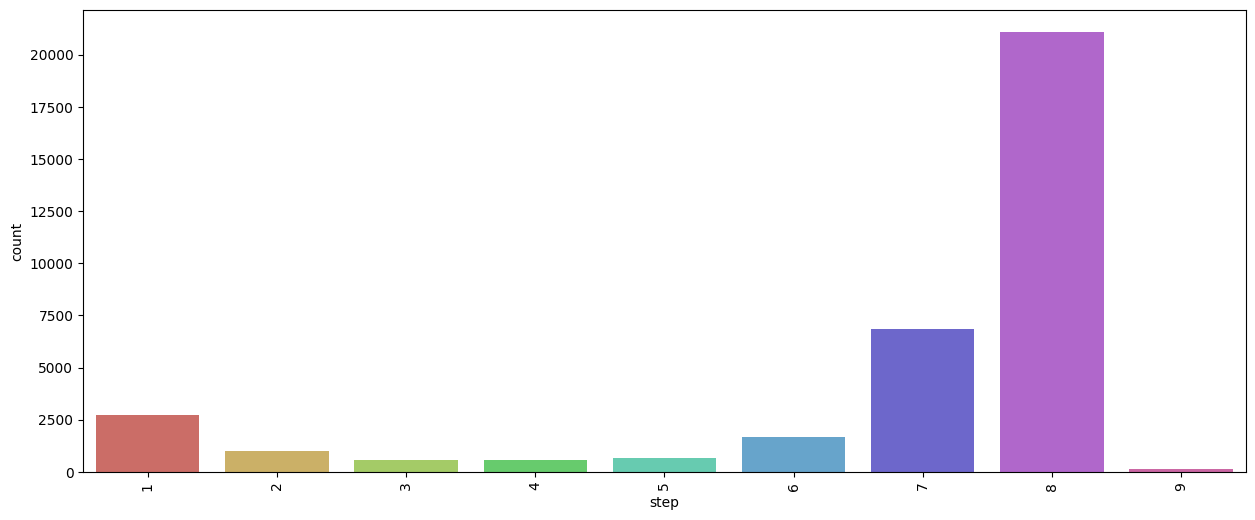

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot( data = df,x=df['step'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['step']

0        1
1        1
2        1
3        1
4        1
        ..
35224    9
35225    9
35226    9
35227    9
35228    9
Name: step, Length: 35229, dtype: int64

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN', 'PAYM'],
      dtype=object)

In [ ]:
df['type'].value_counts()

PAYMENT     16726
CASH_OUT     8169
CASH_IN      6408
TRANSFER     3365
DEBIT         560
PAYM            1
Name: type, dtype: int64

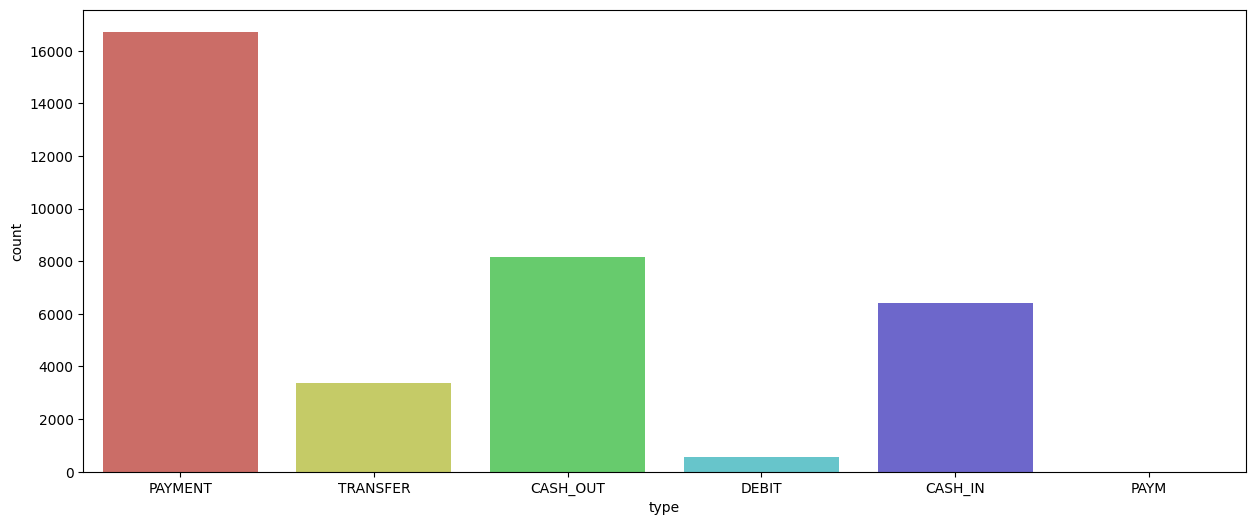

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['type'], data = df, palette = 'hls')
plt.show()